$$\require{mhchem}$$       

# Nonisothermal PFR [2 pts]

Complete the final example from 11/19 (PFR with counter-flow heat exchanger) with your choice of solver (BVP_nl or solve_bvp from scipy). Comment on any numerical troubles or issues you ran into along the way.

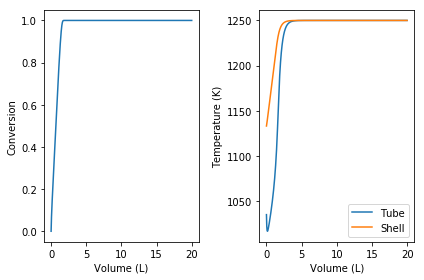

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Fa0 = 0.0376      # mol/s
Ca0 = 0.0188      # mol / L

v0 = Fa0 / Ca0    # initial volumetric flow
Ft0 = Fa0

T0 = 1035.0       # K

Hrxn_298 = 80.77  # kJ/mol at 298K
Cpa = 0.1630      # kJ/mol/K
Cpb = 0.083
Cpc = 0.071

Tshell0 = 1100.0    # ambient heat exchanger temperature
Ua = 0.0165         # overall heat transfer coefficient
mdot = 1.0          # mol/s coolant flow rate
Cpcoolant = 0.0345  # Heat capacity of coolant

def bvp(V, Y):
    Fa, T, Tshell = Y

    extent = (Fa - Fa0) / (-1.0)
    Fb = extent
    Fc = extent

    Ft = Fa + Fb + Fc

    v = v0 * Ft / Ft0 * T / T0

    k = np.exp(34.3 - 34222.0 / T)
    Ca = Fa / v
    r = k * Ca
    ra = -r
    Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

    dFadV = ra

    Qdot = Ua * (Tshell - T)
    dTdV = (-Hrxn * r + Qdot) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)
    dTshelldV = Qdot / (mdot * Cpcoolant)

    return [dFadV, dTdV, dTshelldV]

def bc(Ya, Yb):
    Faa, Ta, Tsa = Ya
    Fab, Tb, Tsb = Yb
    return [Faa - Fa0, Ta - T0, Tsb -1250]

L = 20
Vspan = np.linspace(0, 20, 100)  # volume in L

Fapars = np.polyfit([0, L/2, L], [Fa0, 0.002, 0], 2)
Fa = np.polyval(Fapars, Vspan)
Tpars = np.polyfit([0, L/2, L], [T0, 1175, 1200], 2)
T = np.polyval(Tpars, Vspan)
Tspars = np.polyfit([0, L/2, L], [Tshell0, 1175, 1200], 2)
Tshell = np.polyval(Tspars, Vspan)
Y = np.array([Fa, T, Tshell])

sol = solve_bvp(bvp, bc, Vspan, Y)

Fa = sol.y[0]
T = sol.y[1]
Tshell = sol.y[2]
X = ((Fa - Fa0) * (-1) / Fa0)

plt.subplot(1, 2, 1)
plt.plot(sol.x, X)
plt.xlabel('Volume (L)')
plt.ylabel('Conversion')

plt.subplot(1, 2, 2)
plt.plot(sol.x, T, label='Tube')
plt.plot(sol.x, Tshell, label='Shell')
plt.xlabel('Volume (L)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.tight_layout()

plt.show()